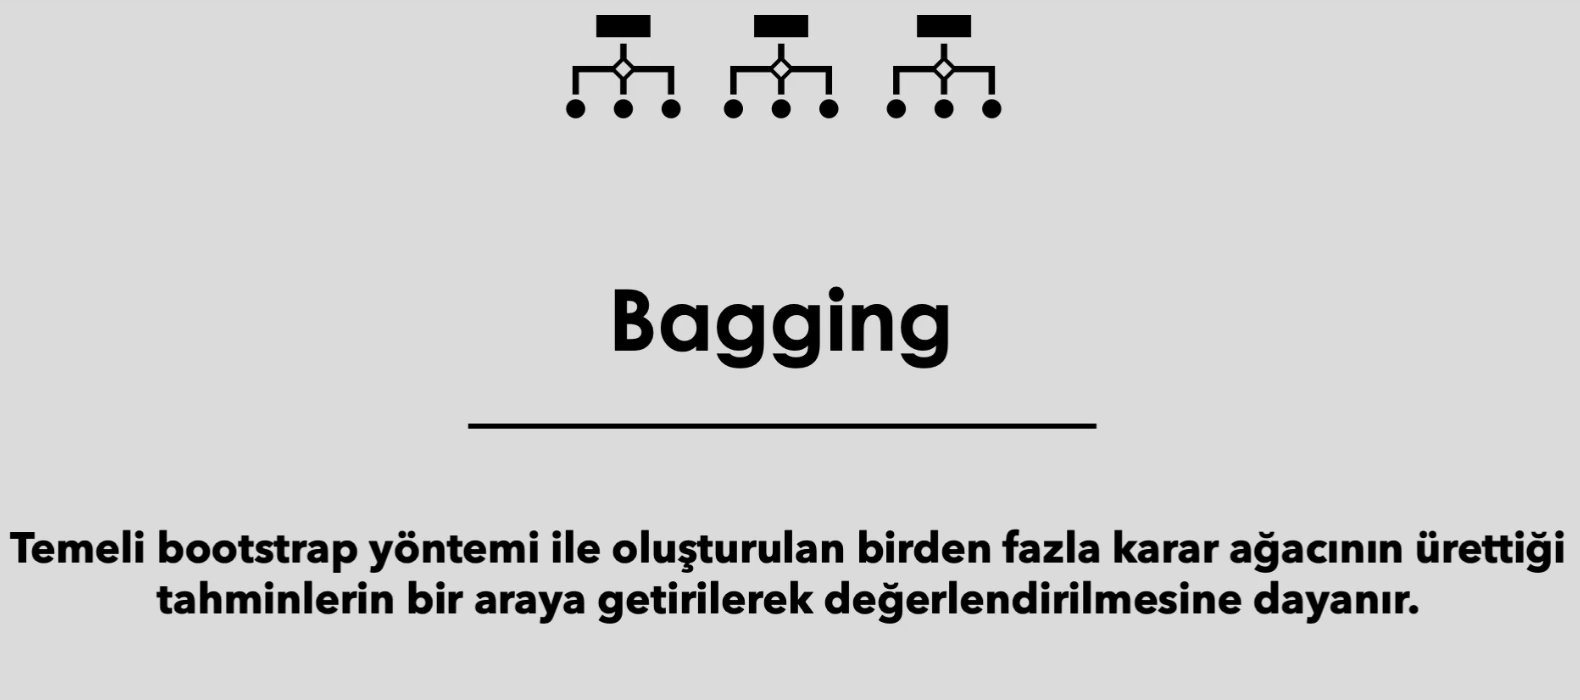

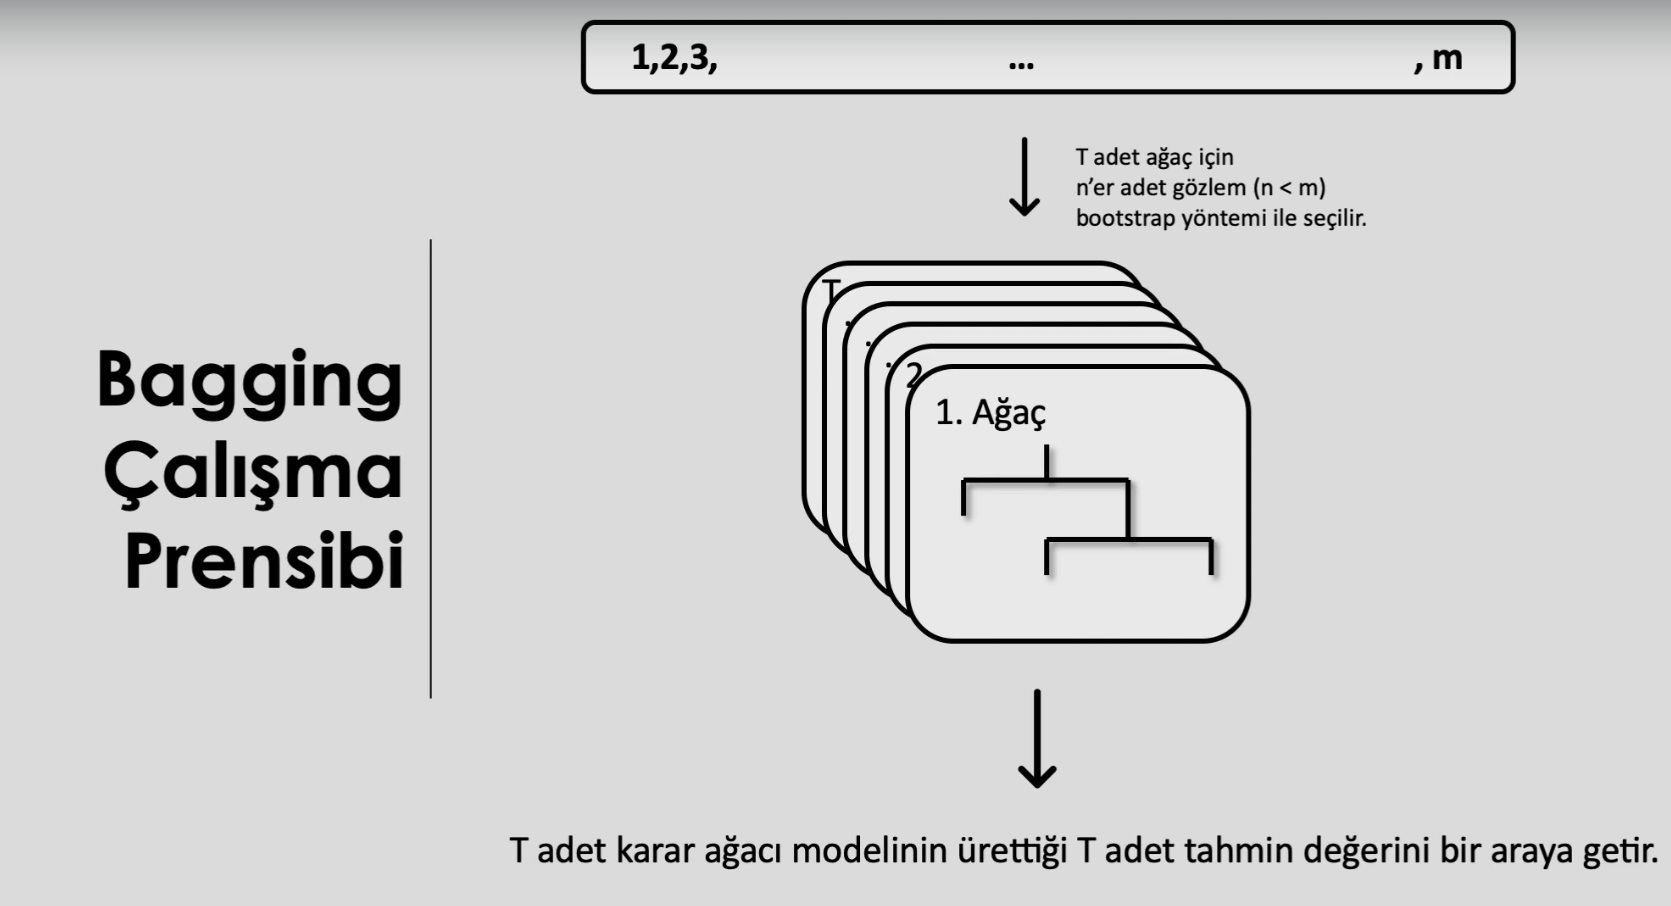

### Bagged Trees Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'],axis=1).astype("float64")
X = pd.concat([X_ ,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X , y, test_size=0.25, random_state=42)

In [3]:
bag_model = BaggingRegressor(bootstrap_features= True)
bag_model.fit(X_Train, Y_Train).get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
bag_model.n_estimators

10

In [5]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=553572626),
 DecisionTreeRegressor(random_state=1767915991),
 DecisionTreeRegressor(random_state=664635960),
 DecisionTreeRegressor(random_state=1780506522),
 DecisionTreeRegressor(random_state=2018464993),
 DecisionTreeRegressor(random_state=2137495648),
 DecisionTreeRegressor(random_state=426406921),
 DecisionTreeRegressor(random_state=1121843478),
 DecisionTreeRegressor(random_state=2073656578),
 DecisionTreeRegressor(random_state=1399788886)]

In [6]:
bag_model.estimators_samples_

[array([144, 188,  84,  59, 137, 147, 171, 134,  14, 132,  34,  48,  93,
        112,  56,  50,  21, 157, 152,  43,  45, 170, 114,  97, 119, 184,
         45,  51,   5,  82, 138,  90,  70,  67, 160,  84, 115, 151, 120,
         67, 141, 119, 159,  37,  36, 194, 153,  58, 189,  81, 116, 180,
         47,  46, 181,   0, 142,  80,  96, 106, 155, 161, 191,   3,  80,
        107, 110,  73,  56,  64, 101,  68,  93, 175,  74, 181,  61, 136,
         59, 111, 161, 167, 177,  45,  38, 180,  20,  23, 173,  14, 109,
        157, 136, 132,   4, 144, 145,   7,  90,  97, 141,  74, 122, 109,
          1,  70, 194,  76, 159, 146, 131, 149, 125,  46,  70,  16,  21,
        174, 171, 133, 103, 130, 193,  49,  20,  39,  25,  31, 174, 192,
         74, 117, 121, 121, 141,  28, 172, 171, 160, 119,   1, 195,  25,
         40,  24, 148, 164,  35, 153,  59, 146,  47,  95, 124,   2, 103,
         12,  44, 136,  87, 109, 103, 181,  96,  48, 159,  49,  86, 195,
        138,  16, 104,  16, 192,  44,  63, 126,  33

In [7]:
bag_model.estimators_features_

[array([18,  4,  7,  2, 13, 16,  3,  3,  2,  1,  8,  3, 18,  1, 11, 11, 13,
        10,  5]),
 array([17,  3,  3,  7, 13, 18, 17, 18, 15,  9,  0,  0,  1, 13,  1, 10,  0,
        14,  0]),
 array([16,  8,  7,  2,  2, 15,  9,  0,  5,  0,  9, 10,  5, 15,  4,  0,  9,
         7,  9]),
 array([ 4, 13,  2, 12,  7,  6,  7,  2, 18, 13, 17, 17,  0, 14, 10, 14,  9,
        11, 10]),
 array([ 1, 14,  0,  0,  4, 11, 16,  3,  5,  5,  9, 12, 11, 14,  0,  7, 12,
         6,  7]),
 array([ 0, 12, 14,  0, 14, 10, 18, 16, 17, 10,  7, 18,  1,  1, 11,  6, 13,
        17, 12]),
 array([ 9,  0, 17, 11,  5, 15, 10,  4, 18, 16,  3,  3, 12, 12, 14,  2,  1,
         6,  2]),
 array([14, 12, 13,  1, 15, 17,  5, 16,  1,  3,  9, 14, 10, 14,  4,  5, 11,
        17, 13]),
 array([ 2,  9, 15, 16,  8, 16, 18,  5,  1,  7, 10,  6, 14,  5, 18,  9,  9,
         2, 14]),
 array([ 5,  1,  9, 11, 18,  2,  7, 16,  8, 16, 14, 10,  5, 17,  9, 17,  8,
         9, 12])]

In [8]:
bag_model.estimators_[0].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 553572626,
 'splitter': 'best'}

### Tahmin

In [9]:
y_pred = bag_model.predict(X_Test)
np.sqrt(mean_squared_error(Y_Test, y_pred))

353.5149112221504

In [10]:
iki_y_pred = bag_model.estimators_[1].fit(X_Train,Y_Train).predict(X_Test)

In [11]:
np.sqrt(mean_squared_error(Y_Test, iki_y_pred))

447.4555018857555

In [12]:
yedi_y_pred = bag_model.estimators_[6].fit(X_Train,Y_Train).predict(X_Test)

In [13]:
np.sqrt(mean_squared_error(Y_Test, yedi_y_pred))

455.03121284039406

### Model Tuning

In [15]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_Train, Y_Train).get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
bag_params ={"n_estimators" : range(2,20)}

In [17]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv=10)

In [18]:
bag_cv_model.fit(X_Train, Y_Train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [20]:
bag_cv_model.best_params_

{'n_estimators': 12}

In [21]:
bag_tuned = BaggingRegressor(n_estimators=14, random_state=45)

In [22]:
bag_tuned.fit(X_Train, Y_Train)

BaggingRegressor(n_estimators=14, random_state=45)

In [23]:
y_pred = bag_tuned.predict(X_Test)

In [24]:
np.sqrt(mean_squared_error(Y_Test, y_pred))

346.457987188104